# **1. Importing Libraries and Loading Dataset**

---



In [ ]:
# Basic Dependencies
import pandas as pd
import numpy as np
# For basic Ploting graph and charts
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
# For more plotting options
import seaborn as sns
# To just ignore all the warnings.
import warnings
warnings.filterwarnings("ignore")
# For machine learning modeling
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# staistical analysis
from scipy import stats
from scipy.stats import boxcox
from math import sqrt
# Time-Series analyis
import time
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL

In [ ]:
# setting up output limit 
pd.set_option('max_rows', None) # Set value to print max 25 rows of dataframe in output
pd.set_option('display.max_columns', None) # set value at 'None' to print unlimited column elements in output

In [ ]:
# Loading file from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**There are 29 features to describe appliances energy use :**

1. date : time year-month-day hour:minute:second

2. lights : energy use of light fixtures in the house in Wh

3. T1 : Temperature in kitchen area, in Celsius

4. T2 : Temperature in living room area, in Celsius

5. T3 : Temperature in laundry room area

6. T4 : Temperature in office room, in Celsius

7. T5 : Temperature in bathroom, in Celsius

8. T6 : Temperature outside the building (north side), in Celsius

9. T7 : Temperature in ironing room, in Celsius

10. T8 : Temperature in teenager room 2, in Celsius

11. T9 : Temperature in parents’ room, in Celsius

12. T_out : Temperature outside (from Chievres weather station), in Celsius

13. Tdewpoint : (from Chievres weather station), Â°C

14. RH_1 : Humidity in kitchen area, in %

15. RH_2 : Humidity in living room area, in %

16. RH_3 : Humidity in laundry room area, in %

17. RH_4 : Humidity in office room, in %

18. RH_5 : Humidity in bathroom, in %

19. RH_6 : Humidity outside the building (north side), in %

20. RH_7 : Humidity in ironing room, in %

21. RH_8 : Humidity in teenager room 2, in %

22. RH_9 : Humidity in parents’ room, in %

23. RH_out :Humidity outside (from Chievres weather station), in %

24. Pressure : (from Chievres weather station), in mm Hg

25. Wind speed: (from Chievres weather station), in m/s

26. Visibility :(from Chievres weather station), in km

27. Rv1 :Random variable 1, non-dimensional

28. Rv2 :Random variable 2, non-dimensional

29. Appliances : Total energy used by appliances, in Wh

In [ ]:
# File Directory path 
file_path = '/content/drive/MyDrive/AlmaBetter_Capstone_Projects/ML Capstone Project - II/data_application_energy.csv'

# Appliance_Energy data file
appliance_data = pd.read_csv(file_path, parse_dates=['date'])

# Shape of data.
print(f'Diamentions: {appliance_data.shape[0]} x {appliance_data.shape[1]}')

Diamentions: 19735 x 29


In [ ]:
# Set datetime index due to time series analysis 
appliance_data['date'] = pd.to_datetime(appliance_data['date'])

# appliance_data = appliance_data.set_index('date')

In [ ]:
appliance_data.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.2,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [ ]:
appliance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

Number of entries : 19735

Independent variables : 28 (11 temperature, 10 humidity, 1 pressure, 2 randoms)

Dependent variable : 1 (Appliances)

All features are numerical. No categorical variables. There seems to be no null values in our data set.

# **2. Exploratory Data Analysis**

---

In this data set there are informations about the energy consumption of a house's appliances, temperature and humidity of house's rooms. In addition, there are data (Temperature, Pressure, Humidity, Visibility, Windspeed and Tdewpoint) of weather conditions in the given area. The data set is at 10 min for about 4.5 months.

Our goal is to make appliances' energy load forecasting.

# Time-Series Analysis



In [ ]:
# creating a copy of main dataframe
appliance_data_2 = appliance_data

In [ ]:
# Taking out the required info from date variable and making new columns
appliance_data_2['hour'] = appliance_data_2['date'].dt.hour
appliance_data_2['month'] = appliance_data_2['date'].dt.month
appliance_data_2['weekday'] = appliance_data_2['date'].dt.weekday
# Adding column to mark weekdays (0) and weekends(1) for time series evaluation , 
# decided not to use it for model evaluation as it has least impact
appliance_data_2['week_type'] = ((appliance_data_2['date'].dt.dayofweek)// 5 == 0).astype(int)

In [ ]:
# Set datetime index due to time series analysis 
appliance_data_2 = appliance_data_2.set_index('date')
appliance_data_2 = appliance_data_2.asfreq(pd.infer_freq(appliance_data_2.index))

# Setting Data in 1 hour basis
hourly_appliance_data = appliance_data_2.resample('1H').mean()

In [ ]:
# Shape of data.
print(f'Diamentions: {hourly_appliance_data.shape[0]} x {hourly_appliance_data.shape[1]}')

Diamentions: 3290 x 32



> **Perform STL Decomposition**

STL is an acronym for “Seasonal and Trend decomposition using Loess”, while Loess is a method for estimating nonlinear relationships.

These are the components of a time series >>

**Trend** - Consistent upwards or downwards slope of a time series

**Seasonality** - Clear periodic pattern of a time series(like sine funtion)

**Residual/Noise** - Outliers or missing value




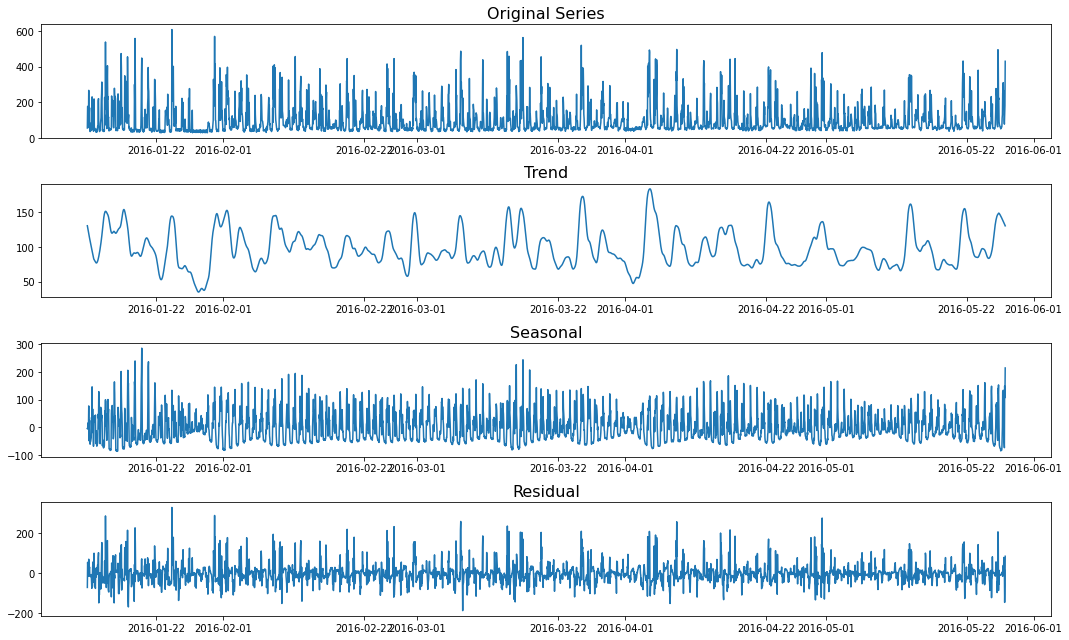

In [ ]:
# Now, for decomposition...
Stl_dec = STL(hourly_appliance_data['Appliances'])
result = Stl_dec.fit()

# setting the parameters
seasonal, trend, resid = result.seasonal, result.trend, result.resid
# Setting up the plot now
plt.figure(figsize=(15, 9))

plt.subplot(4,1,1)
plt.plot(hourly_appliance_data['Appliances'])
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()
plt.show()

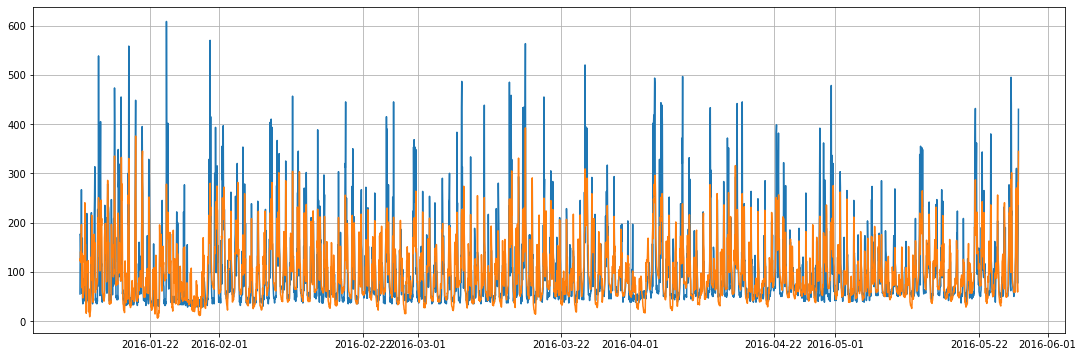

In [ ]:
# comparing the estimated trend with original series to detect anomaly
estimated_trend = trend + seasonal
plt.figure(figsize=(18.5, 6))
plt.plot(hourly_appliance_data['Appliances'])
plt.plot(estimated_trend)
plt.grid()
plt.show()



> **Anomaly Detection**

So, the main idea of using STL in anomaly detection is to calculate the mean and standard deviation of the Residuals component of the STL decomposition and exclude all point for which residuals differs from the average by more than 3.5 times the standard devs.


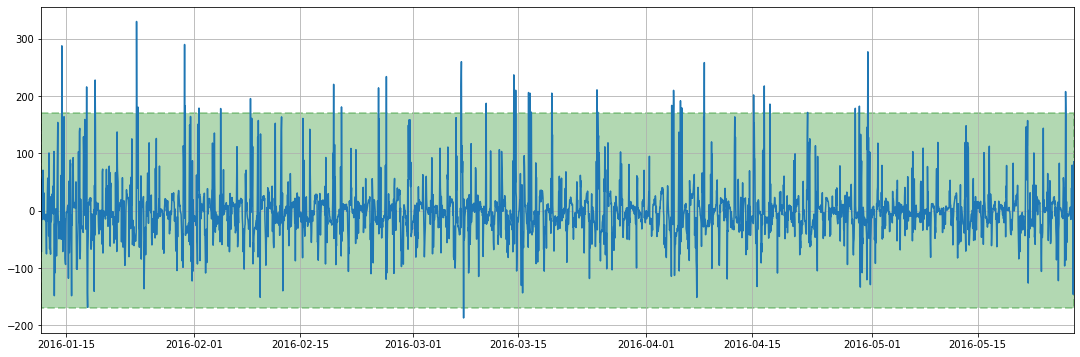

In [ ]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3.5*resid_dev
upper = resid_mu + 3.5*resid_dev

plt.figure(figsize=(18.5, 6))
plt.plot(resid)

plt.fill_between([hourly_appliance_data.index[0], hourly_appliance_data.index[-1]], lower, upper, color='g', alpha=0.3, linestyle='--', linewidth=2)
plt.xlim((hourly_appliance_data.index[0]), (hourly_appliance_data.index[-1]))
plt.grid()
plt.show()

In [ ]:
anomalies = hourly_appliance_data.Appliances[(resid < lower) | (resid > upper)]
print('No. of Anomalies: ',anomalies.shape[0])

No. of Anomalies:  42


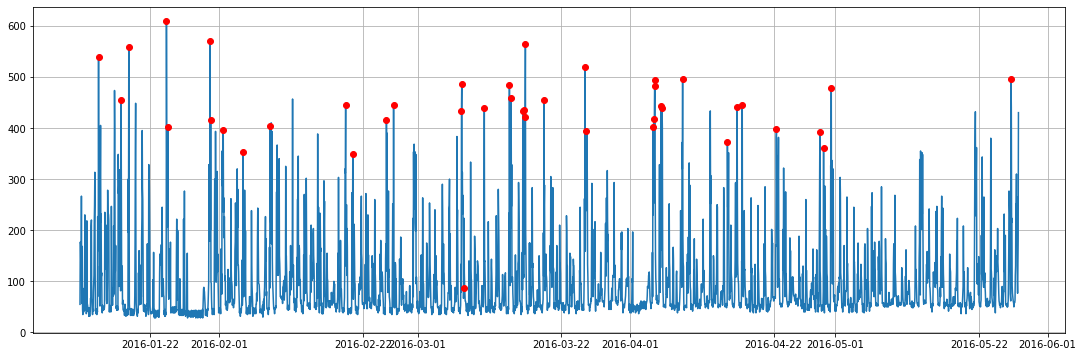

In [ ]:
# vitualizing the anomaly

plt.figure(figsize=(18.5, 6))
plt.plot(hourly_appliance_data['Appliances'])
plt.plot(anomalies, color='r', marker='o',linestyle='None')
plt.grid()
plt.show()

As visualized above, Outliers are considered as the **less than 5%** of top values of appliances' load because it is fact that recordings of power average load higher than 400Wh per hour from a house appliance are not logical. These may be false recordings caused by an instant fault on the recording devices. Additionally, in this data set there are not any NA values. Thus, We will remove these marked outlier to reduce Noise.

In [ ]:
anomalies_sr = anomalies.reset_index().set_index('date')
print('No of Outliers removed: ', anomalies_sr.shape[0])
print('Portion of Outlier data removed: ', round(((anomalies_sr.shape[0]/hourly_appliance_data.shape[0])*100), 2))
# Outlier removal
hourly_appliance_data = hourly_appliance_data[~hourly_appliance_data.isin(anomalies_sr)].dropna()
print('No. of Non-Outliers: ', hourly_appliance_data.shape[0])
print('Portion of Good data: ', round(100 - ((anomalies_sr.shape[0]/hourly_appliance_data.shape[0])*100), 2))

No of Outliers removed:  42
Portion of Outlier data removed:  1.28
No. of Non-Outliers:  3248
Portion of Good data:  98.71



# Around the Clock and Calendar




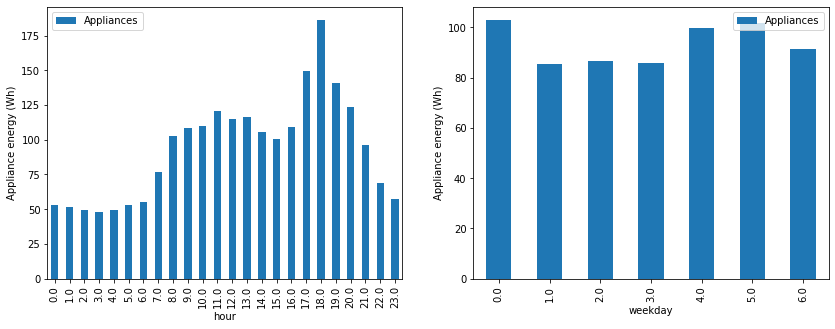

In [ ]:
# focussed displots for hours
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
hourly_appliance_data.groupby('hour').agg({'Appliances' : 'mean'}).plot.bar(ax=ax1)
ax1.set_ylabel('Appliance energy (Wh)')

# focussed displots for Month
hourly_appliance_data.groupby('weekday').agg({'Appliances' : 'mean'}).plot.bar(ax=ax2)
ax2.set_ylabel('Appliance energy (Wh)')
plt.show()

**From Above figure, we can observe the average energy consumption of appliances at different time of the day in the span of 4.5 months. We observe two peak hours. One at 11 am in the morning and other at 6 PM in the evening. While the peak at 11 am is shallow and low, peak at 18 PM is comparatively higher and sharper.**

**We observe that over the sleeping hours (11 PM - 6 AM) the energy consumption of appliances is around 50 Wh. After about 6 AM, energy consumption starts to rise gradually up until 11 AM (probably due to morning chores). And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). However energy consumption of appliances reverts back to 50 Wh, as night approaches and people in the house go to bed at around 10 PM.** 

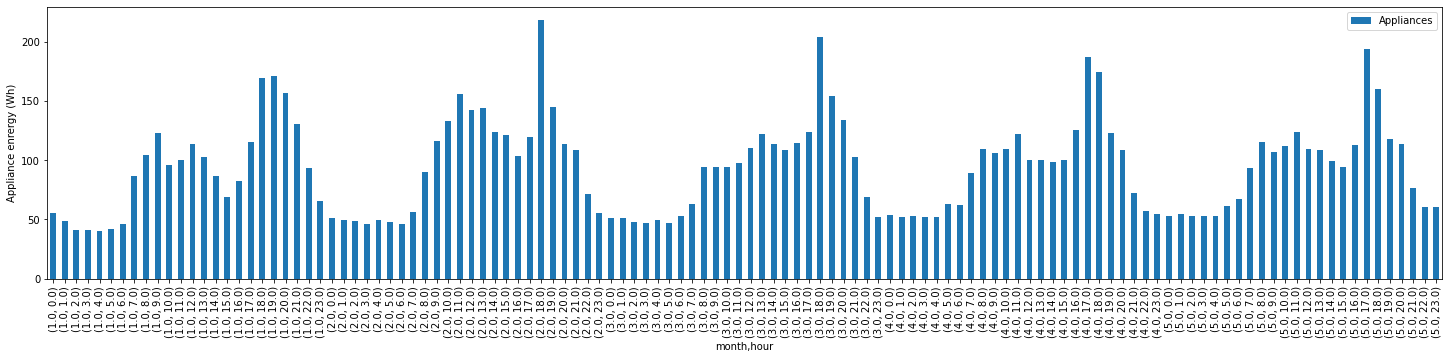

In [ ]:
# focussed displots for Month-hour vs energy load plot
fig, ax = plt.subplots(1,1,figsize=(25,5))
hourly_appliance_data.groupby(['month', 'hour']).agg({'Appliances' : 'mean'}).plot.bar(ax = ax)
ax.set_ylabel('Appliance enrergy (Wh)')
plt.show()

**Above is the Hour-Month trend of the energy consumption of appliances. Above pattern resemblels similar traits with Average Hourly consuption plot. We can say that the pattern is quite repeatative because of the same fact that As in sleeping hours (11 PM - 6 AM) the energy consumption of appliances is lowest at around 50Wh and above 100 Wh in Evening (5PM - 10 PM).**

**Energy consumption in Weekends and Weekdays**

As per defination, Saturday and Sunday especially regarded as a time for leisure or Weekends. And rest of the days, are considered as working days or Weekdays. A week starts with Monday and ends with Sunday, i.e. 0 to 6.

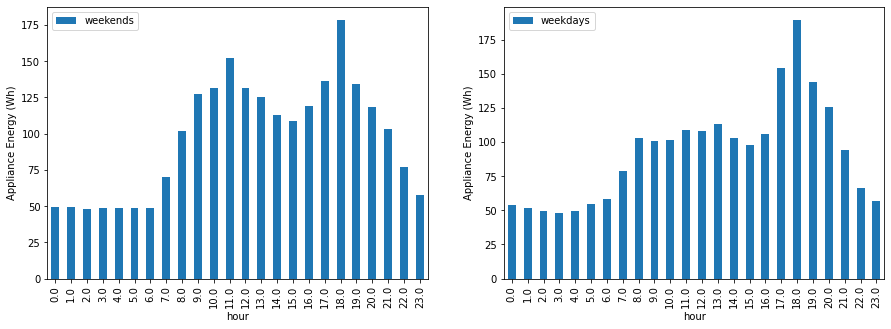

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
# creating hourly wise week data 
week_df = hourly_appliance_data.groupby(['week_type','hour']).agg({'Appliances':'mean'}).reset_index(0)
# Filtering weekends and weekdays from dataframe
week_df[week_df.week_type== 0].Appliances.plot.bar(ax=ax[0], label='weekends')
week_df[week_df.week_type== 1].Appliances.plot.bar(ax=ax[1], label='weekdays')

ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].set_ylabel('Appliance Energy (Wh)')
ax[1].set_ylabel('Appliance Energy (Wh)')
plt.show()

**We observe that the energy consumption of appliances during the office hours (8 AM - 4 PM) is higher in weekends compared to the weekdays. Also, average overall consumption is higher in weekends is pretty high.**

**Lets look at how temperature and humidity levels vary inside different rooms !**

# Descriptive Statistics


> **Temperature Data**

Light column will be removed as the are the reading of submeter and we are not focusing on appliance specific reading

In [ ]:
hourly_appliance_data['lights_per_h'] = hourly_appliance_data.hour * hourly_appliance_data.lights

# Removing 'lights' column
hourly_appliance_data = hourly_appliance_data.drop(columns = ['lights'])

In [ ]:
hourly_appliance_data['avg_home_temp'] = (hourly_appliance_data.T1 + hourly_appliance_data.T2 + hourly_appliance_data.T3 +
                 hourly_appliance_data.T4 + hourly_appliance_data.T5 + hourly_appliance_data.T7 + hourly_appliance_data.T8 + 
                 hourly_appliance_data.T9)/8

In [ ]:
# Saparating the Temperature values from the data and renaming them
temperature_data = {'T1' : 'temp_kitchen', 'T2' : 'temp_living', 'T3' : 'temp_laundry', 
                    'T4' : 'temp_office', 'T5' : 'temp_bath', 'T6' : 'temp_outside',
                    'T7' : 'temp_iron', 'T8' : 'temp_teen_room', 'T9' : 'temp_parents_room', 'T_out' : 'temp_station',
                    'avg_home_temp':'Avg_Inside_temp'}

hourly_appliance_data = hourly_appliance_data.rename(columns = temperature_data)
# Checking out the statistical data of the temperature related columnsx
hourly_appliance_data[temperature_data.values()].describe()

,temp_kitchen,temp_living,temp_laundry,temp_office,temp_bath,temp_outside,temp_iron,temp_teen_room,temp_parents_room,temp_station,Avg_Inside_temp
count,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000
mean,21.693382,20.346158,22.266552,20.861393,19.601422,7.905989,20.275229,22.034873,19.493246,7.413093,20.821532
std,1.609381,2.196202,2.006722,2.046574,1.843375,6.094394,2.111586,1.957988,2.018350,5.327452,1.816891
min,16.790000,16.100000,17.245000,15.100000,15.347500,-5.927685,15.410370,16.364074,14.890000,-4.961111,16.024225
25%,20.750000,18.820833,20.790000,19.544444,18.279190,3.606528,18.715179,20.790000,18.024306,3.650000,19.669887
50%,21.602778,19.996944,22.100000,20.650556,19.390000,7.251111,20.048611,22.149444,19.390000,6.891667,20.602132
75%,22.650000,21.511111,23.300069,22.111935,20.631319,11.229306,21.620119,23.390000,20.600000,10.416667,21.764605
max,26.203333,29.727778,28.975286,26.144762,25.506389,28.136619,25.926667,27.187778,24.500000,25.933333,25.993426


**Mean Temperature distribution per Hour as per the data:**

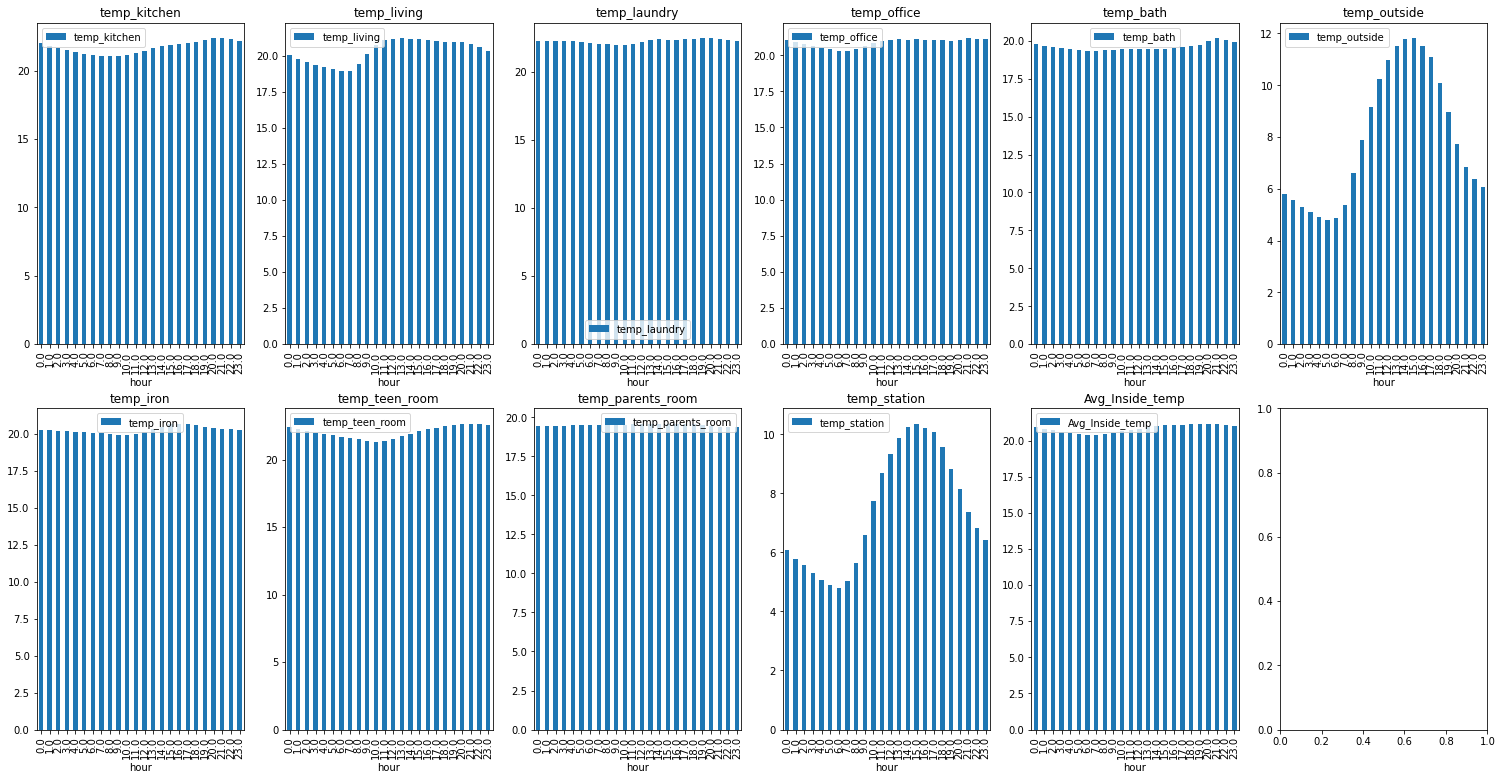

In [ ]:
fig, axes = plt.subplots(2,6,figsize=(26,13))
for i, temp in enumerate(temperature_data.values()):
  hourly_appliance_data.groupby('hour').agg({temp : 'mean'}).plot.bar(ax=axes[i//6, i%6])
  axes[i//6, i%6].legend(loc='best')
  axes[i//6, i%6].set_title(temp)

**OBSERVATIONS :**

1.   Average outside temperature over a period of 4.5 months is around 7.5 degrees. It ranges from -6 to 28 degrees
2.   While average temperature inside the building has been around 20 degrees for all the rooms. It ranges from 14 to 30 degrees.
3.   Which implies, Warming appliances have been used to keep the insides of the building warm. There must be some sort of direct correlation between temperature and consumption of energy inside house.
4.   The average temperature inside each of the rooms has been almost constant over the day. However the average temperature outside the building and near the station changes over the course of the day. 
5.  The average night time temperature is around 6 degree C, while average day time temperature varies over hours and peaks to 12 degree C at about 2-3 PM in the afternoon.

> **Humidity Data**

In [ ]:
hourly_appliance_data['avg_home_hum'] = (hourly_appliance_data.RH_1 + hourly_appliance_data.RH_2 + hourly_appliance_data.RH_3 +
                 hourly_appliance_data.RH_4 + hourly_appliance_data.RH_5 + hourly_appliance_data.RH_7 + hourly_appliance_data.RH_8 + 
                 hourly_appliance_data.RH_9)/8

In [ ]:
# Saparating the Humidity values from the data and renaming them
Humidity_data = {'RH_1' : 'humid_kitchen', 'RH_2' : 'humid_living', 'RH_3' : 'humid_laundry', 
                 'RH_4' : 'humid_office', 'RH_5' : 'humid_bath', 'RH_6' : 'humid_outside',
                 'RH_7' : 'humid_iron', 'RH_8' : 'humid_teen_room', 'RH_9' : 'humid_parents_room', 
                 'RH_out' : 'humid_station','avg_home_hum':'AVg_Inside_Hmd'}

hourly_appliance_data = hourly_appliance_data.rename(columns = Humidity_data)
# Checking out the statistical data of the Humidity related columns
hourly_appliance_data[Humidity_data.values()].describe()

,humid_kitchen,humid_living,humid_laundry,humid_office,humid_bath,humid_outside,humid_iron,humid_teen_room,humid_parents_room,humid_station,AVg_Inside_Hmd
count,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000
mean,40.243854,40.420735,39.233585,39.030839,50.965958,54.615172,35.408276,42.956861,41.558216,79.796541,41.227291
std,3.934956,4.056864,3.242154,4.334516,8.637317,31.072614,5.108270,5.212226,4.144927,14.826053,3.960027
min,27.509167,21.010000,29.700556,28.715571,30.188611,1.000000,23.340278,29.738611,29.218889,25.250000,31.006155
25%,37.328333,37.914351,36.874583,35.528611,45.491667,30.202250,31.508405,39.144444,38.528125,70.500000,38.343827
50%,39.637014,40.495556,38.530278,38.401389,49.271019,55.123750,34.925069,42.416488,40.845681,83.833333,40.570288
75%,43.060833,43.281731,41.750833,42.172222,53.894583,83.305278,39.028562,46.579479,44.355278,91.583333,44.158711
max,53.980139,53.914975,49.472222,50.747222,94.884074,99.900000,51.191296,58.707315,53.140000,100.000000,52.560231


**Mean Humidity distribution per Hour as per the data:**

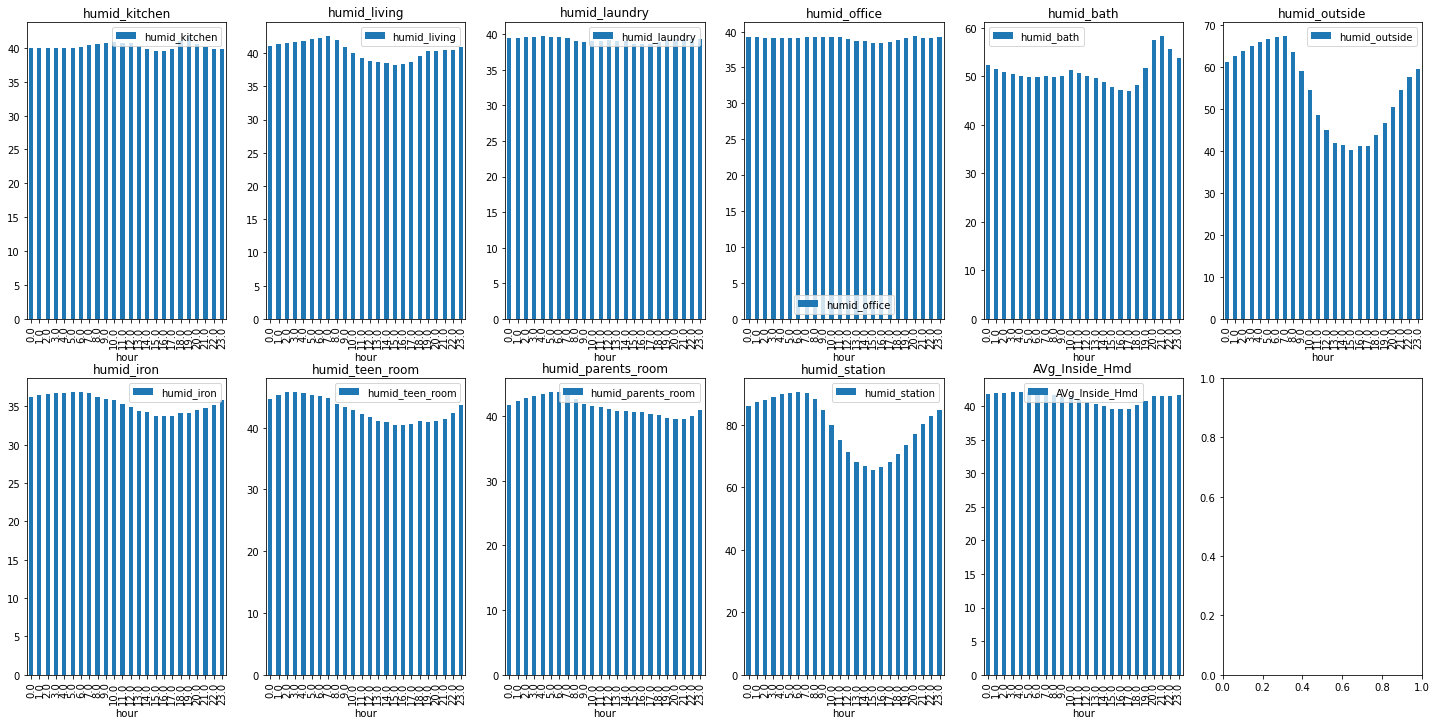

In [ ]:
fig, axes = plt.subplots(2,6,figsize=(25,12))
for i, humid in enumerate(Humidity_data.values()):
  hourly_appliance_data.groupby('hour').agg({humid : 'mean'}).plot.bar(ax=axes[i//6, i%6])
  axes[i//6, i%6].legend(loc='best')
  axes[i//6, i%6].set_title(humid)

**OBSERVATIONS :**

1.   Average humidity outside the building has been higher than the average humidity inside.
2.   Average humidity at the weather station is significantly higher compared to outside humidity near the building.
3.   Average humidity in the bathroom is significantly higher compared to other rooms due to obvious reasons.
4.   Kids and parent room show a comparatively higher average humidity as well signifying the fact that, inhabitants of this building spend most of their time in these buildings.



> **Weather Data**



In [ ]:
Weather_data = hourly_appliance_data[["lights_per_h","Tdewpoint", "Press_mm_hg", "Windspeed", "Visibility"]]

# Checking out the statistical data of the Humidity related columns
Weather_data.describe()

,lights_per_h,Tdewpoint,Press_mm_hg,Windspeed,Visibility
count,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000
mean,57.242406,3.770138,755.512762,4.030763,38.338696
std,120.172537,4.196575,7.405786,2.433438,11.234136
min,0.000000,-6.475000,729.383333,0.416667,1.000000
25%,0.000000,0.947917,750.916667,2.000000,31.833333
50%,0.000000,3.412500,756.100000,3.583333,40.000000
75%,36.666667,6.568750,760.925000,5.416667,40.000000
max,930.000000,15.250000,772.258333,13.000000,66.000000


**OBSERVATIONS :**

1.   Average atmospheric pressure outside the building is 755.52
2.   Windspeed can go from nothing to rapid 14m/s
3.   Majority of the times there is 0 usage of light, yet the it shows a sharp peak of energy usage when it used.

# Distribution of Feature and Target Variables



In [ ]:
# creating Feature and target variables
feature_vars = hourly_appliance_data[['hour','lights_per_h','temp_kitchen', 'humid_kitchen', 'temp_living',
       'humid_living', 'temp_laundry', 'humid_laundry', 'temp_office','humid_office', 'temp_bath', 'humid_bath', 
       'temp_outside','humid_outside', 'temp_iron', 'humid_iron', 'temp_teen_room', 'humid_teen_room',
       'temp_parents_room', 'humid_parents_room', 'AVg_Inside_Hmd', 'Avg_Inside_temp','temp_station', 'Press_mm_hg',
       'humid_station', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']]

target_var = hourly_appliance_data[['Appliances']]

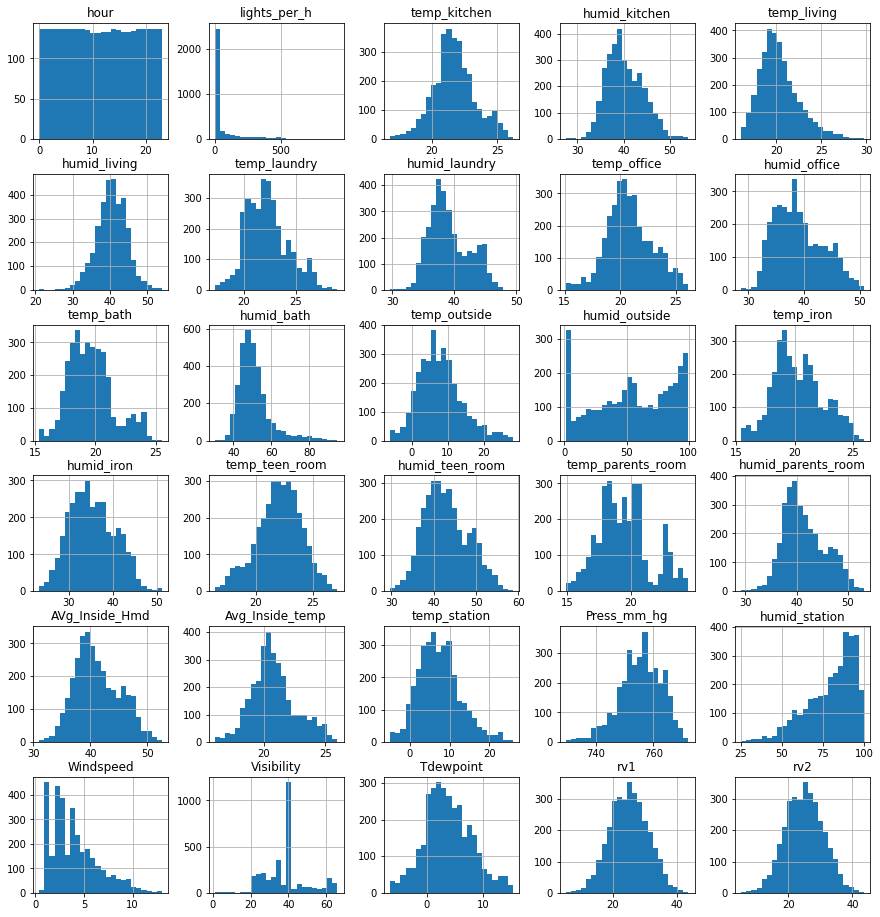

In [ ]:
# histogram of all features
feature_vars.hist(bins=24, figsize=(15,16)) 
plt.show()

In [ ]:
# checking the skewness of the different feature veriables
feature_vars.skew().sort_values(ascending= False)

lights_per_h          2.691039
humid_bath            1.688869
temp_living           0.886051
Windspeed             0.873759
temp_outside          0.598869
temp_bath             0.558473
temp_station          0.537832
humid_laundry         0.462204
temp_laundry          0.453268
humid_office          0.448132
Visibility            0.439863
humid_kitchen         0.430667
Avg_Inside_temp       0.388308
temp_parents_room     0.382587
humid_parents_room    0.380432
AVg_Inside_Hmd        0.330996
humid_teen_room       0.311428
temp_iron             0.258068
humid_iron            0.248107
Tdewpoint             0.244614
temp_office           0.170594
temp_kitchen          0.121356
rv1                   0.016068
rv2                   0.016068
hour                  0.005942
humid_outside        -0.240744
temp_teen_room       -0.260336
humid_living         -0.267040
Press_mm_hg          -0.424263
humid_station        -0.932099
dtype: float64

**Observations based on distribution plot**

1. All features values except ***'lights_per_h'*** ,'***humid_outside***' and '***Visibility***' follow a Normal distribution, i.e., Almost all the readings from sensors inside the home are from a Normal distribution.

2. Similarly, all temperature readings follow a Normal distribution except for '***temp_parents_room***' which is sort of unstable near tail end.

3. Out of the remaining columns, we can see that ***humid_outside***,***temp_teen_room***, ***humid_living***, ***Press_mm_hg*** and ***humid_station*** are strong negatively skewed whereas ***'lights_per_h'*** ,***'humid_bath'*** and ***windspeed*** is strong positivly skwed. 

4. The random variables ***rv1*** and ***rv2*** have more or less the same values for all the recordings.


In [ ]:
target_var_2D = target_var.reset_index().drop(columns = ['date'], axis=1)
target_var_1D = target_var_2D.squeeze()

Appliances    2.126806
dtype: float64


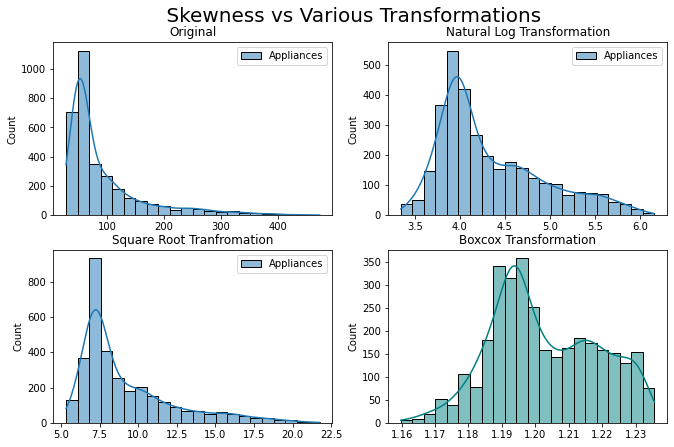

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(11, 7))

# creating plot grid
sns.histplot(data= target_var, kde=True, color="skyblue", ax=axs[0, 0], bins= 22)
sns.histplot(data= np.log(target_var), kde=True, color="olive", ax=axs[0, 1], bins=22)
sns.histplot(data= np.sqrt(target_var), kde=True, color="gold", ax=axs[1, 0], bins = 22)
transformed_data, best_lambda = boxcox(target_var_1D)
sns.histplot(data= transformed_data, kde=True, color="teal", ax=axs[1, 1], bins = 22)

# The amount of space above titles
plt.suptitle(" Skewness vs Various Transformations", y = 0.95, fontsize=20)

### Bathrooms
axs[0][0].set_title("Original")
axs[0][1].set_title("Natural Log Transformation")
axs[1][0].set_title("Square Root Tranfromation")
axs[1][1].set_title("Boxcox Transformation")

print(target_var.skew())
plt.show()

In [ ]:
# Appliance column range with consumption less than 250 Wh
print('Percentage of the appliance consumption is less than 250 Wh\n')
print(((target_var[target_var <= 250].count()) / (len(target_var)))*100 )

Percentage of the appliance consumption is less than 250 Wh

Appliances    94.519704
dtype: float64


**Appliance** - The distrution is right skwed and majority of appliances uses less than 250 Wh of energy. With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high. 

After appling Log, Square root and Reciprocal Transformation we can see that the Log transformation works the best to remove the skewness of the Target Variable.

In [ ]:
# creating a copy and then performing log transformation on target veriable
log_trans_hourly_appliance_data = hourly_appliance_data.copy()
log_trans_hourly_appliance_data['Appliances'] = np.log(log_trans_hourly_appliance_data['Appliances'])

# Correlation Metrix

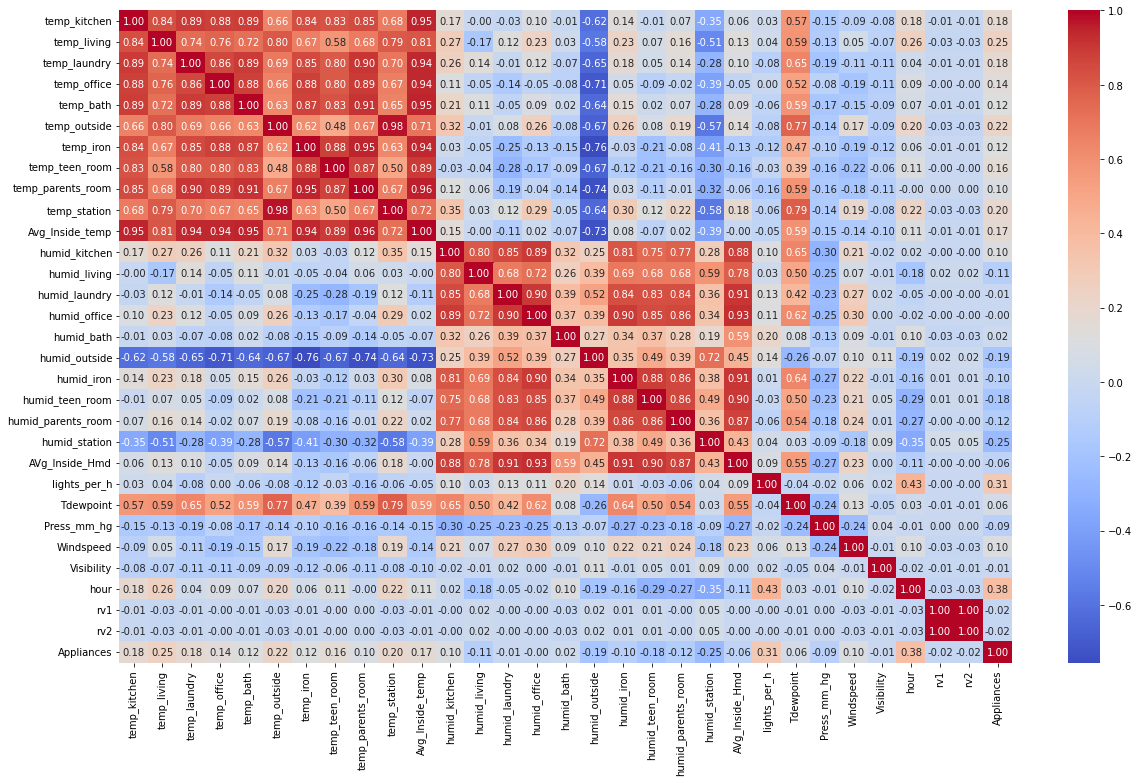

In [ ]:
# correlation metrix on Un-Transformed data

cols = list(temperature_data.values())
cols.extend(list(Humidity_data.values()))
cols.extend(list(Weather_data))
cols.extend(['hour','rv1', 'rv2', 'Appliances'])
fig, ax = plt.subplots(1, 1,figsize=(20,12))

corr_matrix = log_trans_hourly_appliance_data[cols].corr()

sns.heatmap(corr_matrix, ax=ax, fmt = '.2f', annot=True, cmap= 'coolwarm')
plt.show()

In [ ]:
# Correlation of all feature with log transformed target veriable
cols_2 = list(temperature_data.values())
cols_2.extend(list(Humidity_data.values()))
cols_2.extend(list(Weather_data))
cols_2.extend(['hour','rv1', 'rv2', 'Appliances'])

corr_matrix_2 = log_trans_hourly_appliance_data[cols_2].corr()
print(corr_matrix_2['Appliances'].sort_values(ascending=False))

Appliances            1.000000
hour                  0.382695
lights_per_h          0.313682
temp_living           0.246270
temp_outside          0.220044
temp_station          0.195496
temp_laundry          0.178534
temp_kitchen          0.178181
Avg_Inside_temp       0.168430
temp_teen_room        0.156752
temp_office           0.144911
temp_bath             0.118176
temp_iron             0.117377
Windspeed             0.104093
humid_kitchen         0.101987
temp_parents_room     0.095664
Tdewpoint             0.061813
humid_bath            0.021792
humid_office         -0.000519
Visibility           -0.006985
humid_laundry        -0.007519
rv1                  -0.023777
rv2                  -0.023777
AVg_Inside_Hmd       -0.057314
Press_mm_hg          -0.086521
humid_iron           -0.097406
humid_living         -0.107068
humid_parents_room   -0.121718
humid_teen_room      -0.180761
humid_outside        -0.185557
humid_station        -0.253022
Name: Appliances, dtype: float64




> **Multi collinearity check**



In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(log_trans_hourly_appliance_data, 40))

Top Absolute Correlations
rv1                 rv2                   1.000000
temp_outside        temp_station          0.975887
temp_parents_room   Avg_Inside_temp       0.956258
temp_kitchen        Avg_Inside_temp       0.948482
temp_bath           Avg_Inside_temp       0.946874
temp_iron           temp_parents_room     0.945868
temp_office         Avg_Inside_temp       0.942493
temp_iron           Avg_Inside_temp       0.941471
temp_laundry        Avg_Inside_temp       0.938986
humid_office        AVg_Inside_Hmd        0.929651
temp_bath           temp_parents_room     0.914367
humid_iron          AVg_Inside_Hmd        0.909682
humid_laundry       AVg_Inside_Hmd        0.908244
temp_laundry        temp_parents_room     0.904485
humid_laundry       humid_office          0.903788
humid_teen_room     AVg_Inside_Hmd        0.903204
humid_office        humid_iron            0.895551
temp_kitchen        temp_laundry          0.894719
temp_laundry        temp_bath             0.892831
temp_

**OBSERVATIONS:**

1.   From the correlation graph we clearly observe that the features related to temperature and features related to humidity have positive correlation within themselves whereas have a very little to no correlation with each other.

2.   **Humidity outside** have a strong negative correlation with temperature levels as already discussed.

3.   Apart from that we observe that a couple features such as humidity at station, temperature outside the building and temperature in the living room have a comparatively high absolute correlation (above 0.12) with Appliances energy consumption.

4.  Four columns have a high degree of correlation with ***temp_parent_room*** - ***temp_laundry, temp_bath, temp_iron, temp_teen_room*** also ***temp_outside & temp_station*** has high correlation (both temperatures from outside). Hence ***temp_outside & temp_parents_room*** can be removed from training set as information provided by them can be provided by other fields.

4.   Tdewpoint shows a high correlation with most of the inside tempearture and humidity level features than any other weather parameters. **Pressure, windspeed and visibiltiy** show little to no correlation. 

5.   The random variables **rv1**, **rv2** and **Visibility**, **Tdewpoint**, **Press_mm_hg** have low correlation with the target variable.

6.   Features like '**rv1**', '**rv2**', '**month**' and '**week_type**' are safe to remove.

# **3. Data Preprocessing**

---





Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
#Split training dataset into independent and dependent varibales
X = log_trans_hourly_appliance_data.drop(columns = ['Appliances', 'rv1', 'rv2', 
                                                    'month','week_type'], axis=1)

y = log_trans_hourly_appliance_data[['Appliances']]

In [ ]:
# Spliting the data into Test and Train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2598, 29)
(650, 29)
(2598, 1)
(650, 1)


In [ ]:
def evaluate_model(model, true, predicted):

  """Function which gives output of the model implimentation on train and test set (Used as Output Display) """
  true = np.array(true)
  errors = abs(predicted - true)
  mape = 100 * np.mean(errors / true)
  r_score = 100*r2_score(true, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  accuracy = 100 - mape
  
  print(model,'\n')
  print('Average Error       : ',round(np.mean(errors),5), 'degrees')
  print('Variance score R^2  : ',round((r_score),2),'%')
  print('RMSE                : ',round((rmse),5))
  print('Accuracy            : ',round((accuracy),2),'%')
  print('__________________________________')


def evaluate(true, predicted):

  """ Function which evaluates the model and savees the data (Used for making a Comparison table) """
  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  R2_score = metrics.r2_score(true, predicted)

  return rmse, R2_score

In [ ]:
def make_plot(true, predicted):

  """ Actual vs Predicated line chart"""

  plt.figure(figsize=(20,7))
  plt.plot((predicted))
  plt.plot(np.array((true)))
  plt.legend(["Predicted", "Actual"])
  return plt.show()



> **Data Scaling**

The feature set has data in varying ranges . Temperature(-5 to 26.1) , Humidity (1–100) , Windspeed (0 to 14), Pressure (729–772) and Application Energy Usage (log Transfromed, 28.3–563.3). Due to different ranges of features, it is possible that some features will dominate the Regression algorithm. To avoid this situation, all features need to be scaled.Thus, the data was scaled to 0 mean and unit variance using the StandardScaler class in sklearn.preprocessing module.


In [ ]:
# And then use either StandardScaler for preprocessing the dataset
Std_scaler = preprocessing.StandardScaler()

X_train_sc = Std_scaler.fit_transform(X_train)
X_test_sc = Std_scaler.transform(X_test)

# Model Implimentation



> **Lasso Regession Model**



In [ ]:
lasso_model = Lasso(alpha=0.01,
                    max_iter= 1000,
                    selection='random')

lasso_model.fit(X_train_sc, y_train)

Lasso(alpha=0.01, selection='random')

In [ ]:
lass_test_pred = lasso_model.predict(X_test_sc)
lass_train_pred = lasso_model.predict(X_train_sc)

results_df = pd.DataFrame(data=[["Lasso Regression",*evaluate(y_test, lass_test_pred), *evaluate(y_train, lass_train_pred)]], 
                          columns=['Model', 'Test_RMSE', 'Test_R2_Square', 'Train_RMSE', 'Train_R2_Square'])


> **Polynomial Regression**



In [ ]:
poly_reg = PolynomialFeatures(degree=1)

X_train_2_d = poly_reg.fit_transform(X_train_sc)
X_test_2_d = poly_reg.transform(X_test_sc)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d, y_train)

pr_test_pred = lin_reg.predict(X_test_2_d)
pr_train_pred = lin_reg.predict(X_train_2_d)

results_df_2 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_test, pr_test_pred), *evaluate(y_train, pr_train_pred)]], 
                          columns=['Model', 'Test_RMSE', 'Test_R2_Square', 'Train_RMSE', 'Train_R2_Square'])
results_df = results_df.append(results_df_2, ignore_index=True)


> **Random Forest Regressor**




In [ ]:
rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(X_train_sc, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
rf_test_pred = rf_reg.predict(X_test_sc)
rf_train_pred = rf_reg.predict(X_train_sc)

results_df_3 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, rf_test_pred), *evaluate(y_train, rf_train_pred)]], 
                          columns=['Model', 'Test_RMSE', 'Test_R2_Square', 'Train_RMSE', 'Train_R2_Square'])

results_df = results_df.append(results_df_3, ignore_index=True)


> **XGBoost Regressor Model**



In [ ]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', verbosity = 1, gamma = 0.2, 
                             learning_rate = 0.15, n_estimators = 500, seed = 0).fit(X_train_sc, y_train)

xgb_test_pred = xgb_model.predict(X_test_sc)
xgb_train_pred = xgb_model.predict(X_train_sc)

results_df_4 = pd.DataFrame(data=[["XGBoost regression", *evaluate(y_test, xgb_test_pred), *evaluate(y_train, xgb_train_pred)]], 
                          columns=['Model', 'Test_RMSE', 'Test_R2_Square', 'Train_RMSE', 'Train_R2_Square'])
results_df = results_df.append(results_df_4, ignore_index=True)



> **ExtraTreeRegressor**



In [ ]:
etr_reg = ExtraTreesRegressor(random_state=1)
etr_reg.fit(X_train_sc, y_train)

ExtraTreesRegressor(random_state=1)

In [ ]:
etr_test_pred = etr_reg.predict(X_test_sc)
etr_train_pred = etr_reg.predict(X_train_sc)

results_df_5 = pd.DataFrame(data=[["ExtraTrees Regressor", *evaluate(y_test, etr_test_pred), *evaluate(y_train, etr_train_pred)]], 
                          columns=['Model', 'Test_RMSE', 'Test_R2_Square', 'Train_RMSE', 'Train_R2_Square'])

results_df = results_df.append(results_df_5, ignore_index=True)

# Model Comparison

In [ ]:
evaluate_model(lasso_model, y_test, lass_test_pred)
evaluate_model(poly_reg, y_test, pr_test_pred)
evaluate_model(rf_reg, (np.array(y_test)), rf_test_pred)
evaluate_model(xgb_model, (np.array(y_test)), xgb_test_pred)
evaluate_model(etr_reg, (np.array(y_test)), etr_test_pred)

Lasso(alpha=0.01, selection='random') 

Average Error       :  0.50949 degrees
Variance score R^2  :  32.78 %
RMSE                :  0.47432
Accuracy            :  88.41 %
__________________________________
PolynomialFeatures(degree=1) 

Average Error       :  0.34772 degrees
Variance score R^2  :  35.74 %
RMSE                :  0.46374
Accuracy            :  92.17 %
__________________________________
RandomForestRegressor(random_state=1) 

Average Error       :  0.57506 degrees
Variance score R^2  :  61.13 %
RMSE                :  0.36069
Accuracy            :  86.84 %
__________________________________
XGBRegressor(gamma=0.2, learning_rate=0.15, n_estimators=500,
             objective='reg:squarederror', seed=0) 

Average Error       :  0.57567 degrees
Variance score R^2  :  57.38 %
RMSE                :  0.37767
Accuracy            :  86.84 %
__________________________________
ExtraTreesRegressor(random_state=1) 

Average Error       :  0.57743 degrees
Variance score R^2  :  65.6 %

In [ ]:
results_df = results_df.drop_duplicates(subset=['Model'])
results_df

,Model,Test_RMSE,Test_R2_Square,Train_RMSE,Train_R2_Square
0,Lasso Regression,0.474316,0.327783,4.847785e-01,0.309533
1,Polynomial Regression,0.463741,0.357423,4.667119e-01,0.360039
2,Random Forest Regressor,0.360689,0.611278,1.372019e-01,0.944693
3,XGBoost regression,0.377674,0.573804,2.546554e-01,0.809471
4,ExtraTrees Regressor,0.339331,0.655950,6.134726e-15,1.000000


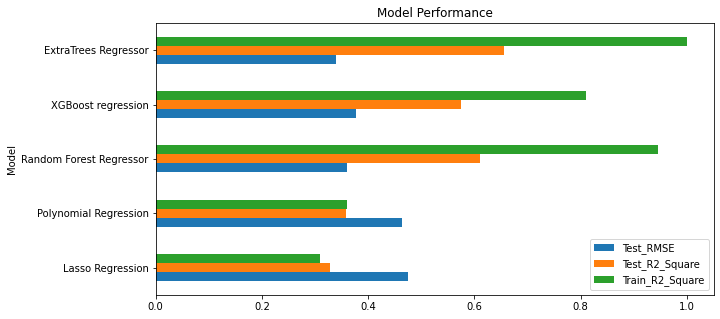

In [ ]:
results_df.plot(x="Model", y=['Test_RMSE', 'Test_R2_Square', 'Train_R2_Square'], kind="barh" , 
                title = 'Model Performance' , figsize= (10,5)) ;

**Obervations**

1. Best results over test set are given by ExtraTrees Regressor with R2 score of 0.655
2. From the chart we can see that the Train R2 score is much greater than Test R2 score which can be due to OVERFITTING on the training data.
2. Least RMSE score is also by ExtraTrees Regressor of 0.339.
3. Lasso regularization over Linear regression was worst performing model with R2 Score of 0.327

# **4. Model Evaluation & Selection**

---



We will use as metric to choose one for the 3 models both R^2 and negative mean absolute error. Models' accuracy (MAPE) derives from the type: 100 + negative mean absolute error with perfect score 100.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

#instead of KFold I use TimeSeriesSplit (10 splits) due to time series data
cv = TimeSeriesSplit(n_splits = 10)

print('Linear Regression Model:\n')
scores = cross_val_score(lasso_model, X_train_sc, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_reg, X_train_sc, y_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))
print('__________________________________\n')

print('Random Forest Model:\n')
scores = cross_val_score(rf_reg, X_train_sc, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_reg, X_train_sc, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))
print('__________________________________\n')

print('XGBoost Regressor Model:\n')
scores = cross_val_score(xgb_model, X_train_sc, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(xgb_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))
print('__________________________________\n')

print('ExtraTree Regressor Model:\n')
scores = cross_val_score(etr_reg, X_train_sc, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(etr_reg, X_train_sc, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Linear Regression Model:

Accuracy: 99.62 (+/- 0.03) degrees
R^2: 0.32 (+/- 0.17) degrees
__________________________________

Random Forest Model:

Accuracy: 99.71 (+/- 0.05) degrees
R^2: 0.52 (+/- 0.16) degrees
__________________________________

XGBoost Regressor Model:

Accuracy: 99.71 (+/- 0.04) degrees
R^2: 0.50 (+/- 0.17) degrees
__________________________________

ExtraTree Regressor Model:

Accuracy: 99.72 (+/- 0.05) degrees
R^2: 0.56 (+/- 0.15) degrees


From the above results the Extra Tree forest model is the best of the 3, with the highest R squared, while accuracy is almost similar in all the models.

Now, we will make some plots to visualize these results.

In [ ]:
y_test_mc = y_test.reset_index().drop(columns = ['date'], axis=1)
y_test_sr = y_test_mc.squeeze()

lass_test_pred_mc = pd.Series(lass_test_pred.ravel())
xgb_test_pred_mc = pd.Series(xgb_test_pred.ravel())
pr_test_pred_mc = pd.Series(pr_test_pred.ravel())
rf_test_pred_mc = pd.Series(rf_test_pred.ravel())
etr_test_pred_mc = pd.Series(etr_test_pred.ravel())

In [ ]:
print(type(y_test_mc))
print(type(y_test_sr))
print(type(etr_test_pred_mc))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
# dataframe for train set prediction results

lasso_plot = pd.DataFrame({'Actual': y_test_sr, 'Predict' : lass_test_pred})
XGB_plot = pd.DataFrame({'Actual': y_test_sr, 'Predict' : xgb_test_pred_mc})
poly_plot = pd.DataFrame({'Actual': y_test_sr, 'Predict' : pr_test_pred_mc})
RF_plot = pd.DataFrame({'Actual': y_test_sr, 'Predict' : rf_test_pred_mc})
ETR_plot = pd.DataFrame({'Actual': y_test_sr, 'Predict' : etr_test_pred_mc})

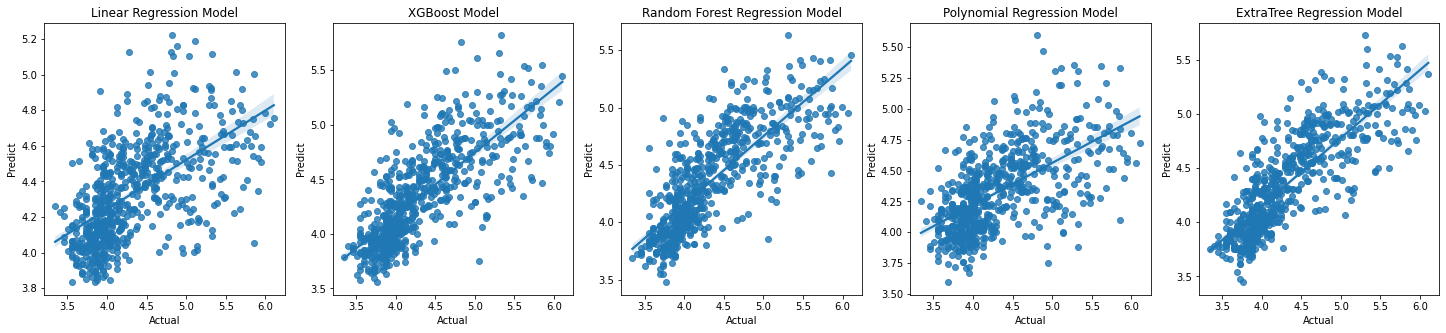

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(25,5))

ax1.set_title('Linear Regression Model')
sns.regplot(x='Actual', y='Predict', data = lasso_plot, ax=ax1)

ax2.set_title('XGBoost Model')
sns.regplot(x='Actual', y='Predict', data = XGB_plot, ax=ax2)

ax3.set_title('Random Forest Regression Model')
sns.regplot(x='Actual', y='Predict', data = RF_plot, ax=ax3)

ax4.set_title('Polynomial Regression Model')
sns.regplot(x='Actual', y='Predict', data = poly_plot, ax=ax4)

ax5.set_title('ExtraTree Regression Model')
sns.regplot(x='Actual', y='Predict', data = ETR_plot, ax=ax5)

plt.show()

# **5. Hyper-parameter Tuning**

---



Random Tree Regressor performed the best with default parameters. I will be using RandomizedSearch cross validation function of the sklearn.model_selection library as it is much faster than GridSearchCV. I already tried Hyper_tunning the model with GridSearchCV, but got better results with RandomizedSearch. Thus, we will be use that and The parameters which were tuned :

In [ ]:
# Benchmark 1 == 
# Average Error       :  0.56745 degrees
# Variance score R^2  :  64.04 %
# RMSE                :  0.34691
# Accuracy            :  87.03 %
# random_grid = {'n_estimators': [100, 250, 300, 450],
#                'max_features': ['auto','log2'],
#                'max_depth': [200, 325, 450, 525],
#                'min_samples_leaf': [3, 4]}

random_grid = {'n_estimators': [225, 350, 475, 550],
               'max_features': ['auto','log2'],
               'max_depth': [450, 600, 750, 900],
               'min_samples_leaf': [2, 3]}

This will try out 4 * 2 * 4 * 2 = 64 combinations in 5 Folds under current settings which is totalling 320 random combnations. We can fit the model, display the best hyperparameters, and evaluate performance:

In [ ]:
# Use the random grid to search for best hyperparameters
ETR = ExtraTreesRegressor(random_state=0)

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores

ETF_random_SCV = RandomizedSearchCV(estimator = ETR, param_distributions = random_grid, n_iter = 120,
                                    cv = 5, verbose = 2, n_jobs = -1,  random_state= 0, scoring='r2')

# Fit the random search model
ETF_random_SCV.fit(X_train_sc, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=0),
                   n_iter=120, n_jobs=-1,
                   param_distributions={'max_depth': [225, 350, 475, 550],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [2, 3],
                                        'n_estimators': [450, 600, 750, 900]},
                   random_state=0, scoring='r2', verbose=2)

In [ ]:
# Return set of parameters with the best performance
best_para = ETF_random_SCV.best_estimator_

In [ ]:
# Checking performance
ETR_RSCV_test_pred = ETF_random_SCV.best_estimator_.predict(X_test_sc)
evaluate_model(best_para, y_test, ETR_RSCV_test_pred)

ExtraTreesRegressor(max_depth=225, min_samples_leaf=2, n_estimators=600,
                    random_state=0) 

Average Error       :  0.57181 degrees
Variance score R^2  :  65.52 %
RMSE                :  0.33971
Accuracy            :  86.93 %
__________________________________


**There little to no improvement has been absorbed aven after hyper tuning.**

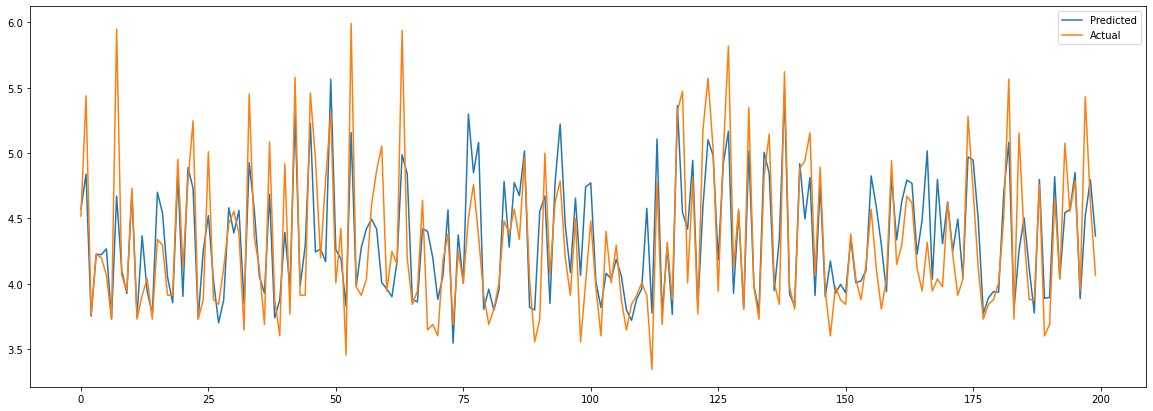

In [ ]:
make_plot(y_test[:200], ETR_RSCV_test_pred[:200])

In [ ]:
# Actual vs Predicted value with Difference
y_test_ay = y_test.reset_index(drop='date').squeeze()
ETR_RSCV_test_pred_mc = pd.Series(ETR_RSCV_test_pred.ravel())

result_with_RSCV = pd.DataFrame({'Actual':y_test_ay, 'Predicted': ETR_RSCV_test_pred_mc, 'Error': (ETR_RSCV_test_pred_mc - y_test_ay)})
result_with_RSCV.sample(10)

,Actual,Predicted,Error
257,4.295015,4.420034,0.125019
267,3.878121,3.852677,-0.025444
291,4.571269,4.286634,-0.284635
538,3.843030,4.024383,0.181352
524,4.121744,4.402516,0.280773
481,4.571269,4.509964,-0.061304
16,4.295015,4.540367,0.245352
530,4.007333,4.113472,0.106139
372,3.976562,4.162997,0.186436
64,4.199705,4.841922,0.642217


# **6. Feature Importance**

---



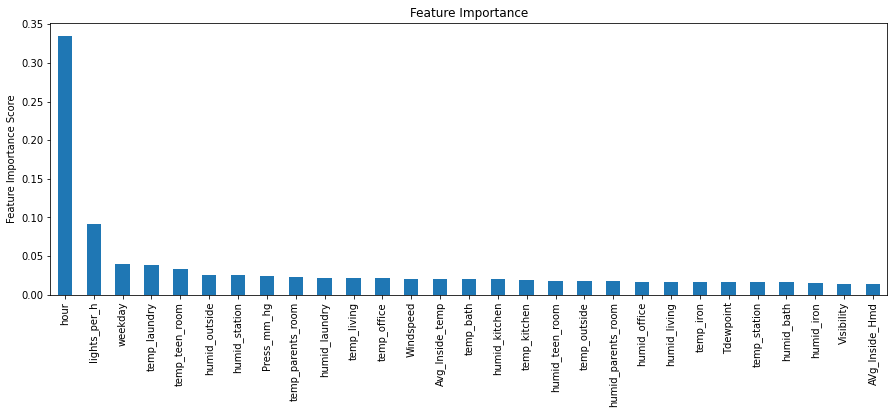

In [ ]:
#Feature importance for top 50 predictors
predictors = [features for features in X.columns]

feature_imp = pd.Series(ETF_random_SCV.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)

plt.rcParams['figure.figsize'] = 15, 5
feature_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score')
plt.show()

In [ ]:
# Reduce test & training set to top 10 feature set
train_important_feature = X_train[['hour','lights_per_h','temp_parents_room','temp_laundry','temp_teen_room',
                                   'Press_mm_hg','humid_laundry','humid_bath','temp_bath','temp_office']]
test_important_feature = X_test[['hour','lights_per_h','temp_parents_room','temp_laundry','temp_teen_room',
                                   'Press_mm_hg','humid_laundry','humid_bath','temp_bath','temp_office']]                           

In [ ]:
# Applying StandardScaler 

train_important_feature = Std_scaler.fit_transform(train_important_feature)
test_important_feature = Std_scaler.transform(test_important_feature)

# Clone the Gridsearch model with his parameter and fit on reduced dataset
from sklearn.base import clone

cloned_model = clone(ETF_random_SCV.best_estimator_)
cloned_model.fit(train_important_feature, y_train)

ExtraTreesRegressor(max_depth=225, min_samples_leaf=2, n_estimators=600,
                    random_state=0)

In [ ]:
# Checking performance
HT_test_pred = cloned_model.predict(test_important_feature)
evaluate_model(best_para, y_test, HT_test_pred)

ExtraTreesRegressor(max_depth=225, min_samples_leaf=2, n_estimators=600,
                    random_state=0) 

Average Error       :  0.57218 degrees
Variance score R^2  :  62.38 %
RMSE                :  0.35485
Accuracy            :  86.93 %
__________________________________


**Performed Feature selection on the basis of importance in the predictive relationship with the target veriable. Top 10 feature where selected for the model and yet the model performance decrease by ~3% compared to Tuned model.**

# **7. Conclusion**

*   The best Algorithm to use for this dataset Extra Trees Regressor.

*   Although, Extra trees regressor over-fits our training data with a R2 score of 1, it also gives, by far, the best performance on test set as well compared to other models, with a R2 score of **0.653**

*    Hyper parameter tuning of our model doesn’t have any significant impact on our test results. We were able to improve the test R2 score results by less than **0.01** 

*   The final model had 22 features.

*   Feature reduction was not able to add to better R2 score.
